Cell bellow is for importing librarys or methods in order to complete assignment.

import numpy as np : Library for numerical computing.

import copy: Used to copy parameters without modifying orginal parameter.

import matplotlib.pyplot as plt: Plotting Library


import pandas as pd: Library for data manipulation

from math import sqrt: Imports square root math function

In [33]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt

In [34]:
# Reads dataset
df = pd.read_csv('D3.csv')
print(df.head())

        0.0  3.4399999999999999  0.44000000000000039  4.387545011044053
0  0.040404            0.134949             0.888485           2.679650
1  0.080808            0.829899             1.336970           2.968490
2  0.121212            1.524848             1.785455           3.254065
3  0.161616            2.219798             2.233939           3.536375
4  0.202020            2.914747             2.682424           3.815420


In [35]:
#Intilization of X(Input) and y(Output Targets)
X = df.iloc[:, :3].values
y = df.iloc[:, 3].values

In [36]:
# Normalization function, standardize features into range of 0 to 1
def standardize(X):
    mean = np.mean(X, axis = 0)
    std = np.sqrt((1/X.shape[0]) * np.sum((X - mean)**2, axis = 0))
    X_standardized = (X - mean) / std
    return X_standardized, mean, std

In [37]:
X_standardized, mean, std = standardize(X)

## Why Feature Scaling Helps Gradient Descent

Feature scaling (standardization) is crucial for gradient descent convergence. The diagrams below illustrate this concept:

![Unnormalized vs Normalized Features](IMG_0083.jpg)

![Cost Function Contours](IMG_0084.jpg)

In [38]:
# Initialize parameters w(weights) and b(bias) to zeros
def initialize_with_zeros(dim):
    w = np.zeros((dim))
    b = 0.0
    return w, b

In [39]:
#S et dimensions for weights and bias
dim = 3
w, b = initialize_with_zeros(dim)

In [40]:
# Prediction and cost function
def pred_cost(w,b,X,y):
    m = X.shape[0]
    
    Z = np.dot(X,w) + b
    A = Z
    
    # Cost function J(θ) = J(θ) = (1/2m) * Σ(hθ(x) - y)²
    cost = (1/(2*m)) * np.sum((A - y)**2)
    
    return cost

In [41]:
# Gradient computation
def compute_gradients(w, b, X, y):
    m = X.shape[0]
    
    Z = np.dot(X,w) + b
    A = Z
    
    dw = (1/m) * np.dot(X.T, (A - y))
    db = (1/m) * np.sum(A - y)
    
    return dw, db

In [42]:
# Prediction function
def predict(w, b, X):
    return np.dot(X, w) + b

In [43]:
# Gradient Descent algorithm
def gradient_descent(w, b, X, y, num_iterations=10000, learning_rate=0.001, print_cost=True):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    cost_history = []

    for i in range(num_iterations):
        dw, db = compute_gradients(w, b, X, y)

        # Gradient update rule - θ := θ - α∇J(θ)
        w = w - learning_rate * dw
        b = b - learning_rate * db

        cost = pred_cost(w, b, X, y)
        cost_history.append(cost)

        if print_cost and i % 100 == 0:
            print(f"Cost after iteration {i}: {cost}")
    
    return w, b, cost_history

In [44]:
# Running Gradient Descent and printing cost every 100 iterations
w, b, cost_history = gradient_descent(w, b, X_standardized, y, num_iterations=10000, learning_rate=0.001, print_cost=True)

Cost after iteration 0: 5.4732946398591436
Cost after iteration 100: 4.595192049785151
Cost after iteration 200: 3.8796573041161615
Cost after iteration 300: 3.296459304057246
Cost after iteration 400: 2.8210125402623243
Cost after iteration 500: 2.4333185653233658
Cost after iteration 600: 2.1171066854741096
Cost after iteration 700: 1.8591362449597504
Cost after iteration 800: 1.648630006535855
Cost after iteration 900: 1.4768139063211896
Cost after iteration 1000: 1.3365431390768994
Cost after iteration 1100: 1.2219983198813822
Cost after iteration 1200: 1.1284385391643825
Cost after iteration 1300: 1.0520006169324372
Cost after iteration 1400: 0.9895358794421951
Cost after iteration 1500: 0.9384774171365371
Cost after iteration 1600: 0.8967321088590945
Cost after iteration 1700: 0.8625927729062566
Cost after iteration 1800: 0.8346666778909784
Cost after iteration 1900: 0.8118173541690674
Cost after iteration 2000: 0.7931172208901933
Cost after iteration 2100: 0.7778090098353072
Cos

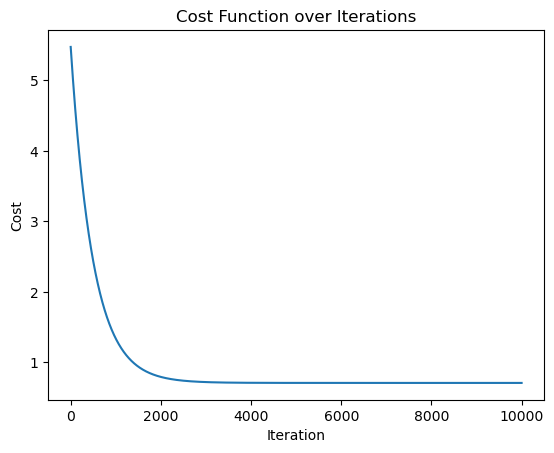

In [45]:
# Plotting the cost function over iterations
import matplotlib.pyplot as plt
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()

In [46]:
# Making predictions on new test cases
test_cases = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]])

test_cases_standardized = (test_cases - mean) / std

predictions = predict(w, b, test_cases_standardized)

print("Predictions:", predictions.flatten())

Predictions: [3.6407321  0.16099262 0.11810941]


In [47]:
# Final Model Report
print("=== TRAINED LINEAR REGRESSION MODEL ===")
print(f"Final cost: {cost_history[-1]:.6f}")
print(f"Converged after {len(cost_history)} iterations")
print()

print("Learned Parameters:")
print(f"θ₀ (bias/intercept): {b:.6f}")
print(f"θ₁ (weight for x₁): {w[0]:.6f}")
print(f"θ₂ (weight for x₂): {w[1]:.6f}")  
print(f"θ₃ (weight for x₃): {w[2]:.6f}")
print()

print("Linear Model Equation:")
print(f"ŷ = {b:.6f} + {w[0]:.6f}*x₁ + {w[1]:.6f}*x₂ + {w[2]:.6f}*x₃")
print()

print("Note: This model uses standardized features.")
print("For predictions on new data, standardize inputs using:")
print(f"x_standardized = (x - mean) / std")
print(f"where mean = {mean}")
print(f"and std = {std}")

=== TRAINED LINEAR REGRESSION MODEL ===
Final cost: 0.708188
Converged after 10000 iterations

Learned Parameters:
θ₀ (bias/intercept): 1.825574
θ₁ (weight for x₁): -2.357661
θ₂ (weight for x₂): 0.652698
θ₃ (weight for x₃): -0.336882

Linear Model Equation:
ŷ = 1.825574 + -2.357661*x₁ + 0.652698*x₂ + -0.336882*x₃

Note: This model uses standardized features.
For predictions on new data, standardize inputs using:
x_standardized = (x - mean) / std
where mean = [2.02020202 1.98545455 1.97535354]
and std = [1.15464163 1.16309378 1.15282576]


In [48]:
# Convert coefficients back to original scale
w_original = w / std
b_original = b - np.sum((mean / std) * w)

print("\n=== MODEL ON ORIGINAL SCALE ===")
print("Converted Parameters (for un-standardized inputs):")
print(f"θ₀ (intercept): {b_original:.6f}")
print(f"θ₁ (weight for x₁): {w_original[0]:.6f}")
print(f"θ₂ (weight for x₂): {w_original[1]:.6f}")
print(f"θ₃ (weight for x₃): {w_original[2]:.6f}")
print()
print("Original Scale Model:")
print(f"ŷ = {b_original:.6f} + {w_original[0]:.6f}*x₁ + {w_original[1]:.6f}*x₂ + {w_original[2]:.6f}*x₃")


=== MODEL ON ORIGINAL SCALE ===
Converted Parameters (for un-standardized inputs):
θ₀ (intercept): 5.413679
θ₁ (weight for x₁): -2.041898
θ₂ (weight for x₂): 0.561174
θ₃ (weight for x₃): -0.292223

Original Scale Model:
ŷ = 5.413679 + -2.041898*x₁ + 0.561174*x₂ + -0.292223*x₃
